In [97]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
#Adding some stuff
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

In [86]:
def plot_results(CatPop, RatPop, title):
    """Plot the estimates and the model.
    
    CatPop: Timeseries of cat population simulation results
    RatPop:  TimeSeries of rat population simulation results
    title: string - gives the graph a title
    """
    plot(CatPop, '--', label='Cat Population')
    plot(RatPop, label='Rat Poulation')
    
    decorate(xlabel = 'Year',
             ylabel = 'NYC Population (million)',
            title=title)

In [87]:
def run_simulation_rat(population, rates, timescale, update_func):
    """Simulate the system using any update function. Predicts the cat/rat pop
    
    populations: State object - Populations of the cat and rat
    rates: System object - Death rates and growth rates
    timescale: How far into the future the predictions go
    update_func: function that computes the population for next year
    
    returns: TimeSeries
    """
    pop = TimeSeries() #Stores the population prediction in a TimeSeries
    pop[0] = population.rat
    for year in range(timescale): #Runs through all the years through the end of the timescale
        pop[year+1] = update_func(pop[year], year, rates)
    return pop

In [88]:
def run_simulation_cat(population, rates, timescale, update_func):
    """Simulate the system using any update function. Predicts the cat/rat pop
    
    populations: State object - Populations of the cat and rat
    rates: System object - Death rates and growth rates
    timescale: How far into the future the predictions go
    update_func: function that computes the population for next year
    
    returns: TimeSeries
    """
    pop = TimeSeries() #Stores the population prediction in a TimeSeries
    pop[0] = population.cats
    for year in range(timescale): #Runs through all the years through the end of the timescale
        pop[year+1] = update_func(pop[year], year, rates)
    return pop

In [89]:
def population_update_rat(pop, year, rates):
    """Update the rat population for the next year.
    
    pop: current rat population in millions
    year: what year it is
    rates: system object with death and growth rates
    """
    growth = rates.growth_rat - rates.death_rat
    return pop + growth

In [90]:
def population_update_cat(pop, year, rates):
    """Update the rat population for the next year.
    
    pop: current cat population in millions
    year: what year it is
    rates: system object with death and growth rates
    """
    growth = rates.growth_rate_cat - rates.death_rate_cat
    return pop + growth

In [91]:
populations = State(cats=95.6, rat=2) #Establishes the cat and rat population. Must be cats and not cat

,values
cats,95.6
rat,2.0


In [92]:
death_rate_cat = 2 #Establishes the death rate for the cat
growth_rate_cat = 3 #Establishes the growth rate for the cat

death_rat = 4 #Establishes the death rate for the rat, this will change based on cat population
growth_rat = 5 #Establishes the growth rate for the rat

5

In [93]:
rates = System(death_rate_cat=death_rate_cat, growth_rate_cat=growth_rate_cat, death_rat=death_rat, growth_rat = growth_rat) #Establishes the system including the death rates

,values
death_rate_cat,2
growth_rate_cat,3
death_rat,4
growth_rat,5


In [94]:
resultsRats = run_simulation_rat(populations, rates, 10, population_update_rat)

,values
0,2.0
1,3.0
2,4.0
3,5.0
4,6.0
5,7.0
6,8.0
7,9.0
8,10.0
9,11.0


In [95]:
resultsCats = run_simulation_cat(populations, rates, 10, population_update_cat)

,values
0,95.6
1,96.6
2,97.6
3,98.6
4,99.6
5,100.6
6,101.6
7,102.6
8,103.6
9,104.6


Saving figure to file figs/project-1.pdf


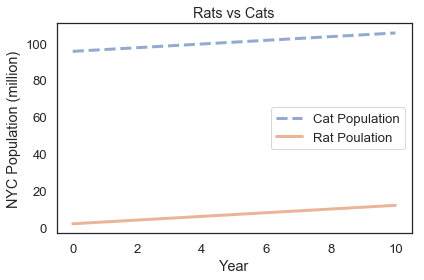

In [96]:
plot_results(resultsCats, resultsRats, 'Rats vs Cats')
savefig('figs/project-1.pdf')

To Do:

- Make rat population growth based on cat population
- Make cat population growth based on rat population
- Plug in more reasonable growth rates